# Section 1:Airbnb business understanding
A house with high review score could attract more tourists to choose it.But here are many factors influencing the review_scores_rating.Through a survey of passenger preferences, we could help the owner earn more.

* find factors which are relevant to review_rate
* Which factors have the greatest impact on the praise rate 
* does increasing the number of bedrooms cause the decrease of cleanliness
* How to avoid a drop in praise rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

# Section 2 : data understanding
let's research the data on listings.csv
## 2.1 gather

In [2]:
df_listings=pd.read_csv('data/listings.csv')
df_listings.head(3) #observe the composition of the dataframe

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


# Section3 :data preparation

we could see many coulumns displayed. Here we only discuss the charactersitics of integer and float types to analyse the data quickly.Of courser it will waste many faetures. I believe i could use the features of string better .

Meanwhile i found that the characteristic of "price" is string. we can't discard it,so i converted it to integer type.

In [3]:
i=0
for price in list(df_listings['price']):
    df_listings['price'][i]=re.findall(r"\d+\.?\d*",price)[0] #extract numbers from string by regular expression
    i=i+1


/Users/kriny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df_listings[u"price"] = pd.to_numeric( df_listings[u"price"])
type(df_listings['price'][6]) #check out Whether the conversion was successful

numpy.float64

### nice!!!

## 3.1 choose the appropriate date

In [5]:
num_vars = df_listings.select_dtypes(include=['float','int']).columns #choose these characteristics of float and integer
num_vars

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [6]:
df_number=pd.DataFrame() # put the columns to a new dataframe
for col in num_vars:
    df_number[col]=df_listings[col]
df_number.shape

(3585, 34)

In [7]:
def delete_meaningless_columns(dataframe,threshold):
    lists=list(dataframe.isnull().mean()<threshold)#Delete columns where the proportion of null values exceeds the threshold
    df=pd.DataFrame()
    m=0
    for i in lists:
        if(i==True):
            df[dataframe.columns[m]]=dataframe[dataframe.columns[m]]
            m=m+1
        else:
            m=m+1
    print("we delete {} columns".format(dataframe.shape[1]-df.shape[1]))
    return df

In [8]:
df_number=delete_meaningless_columns(df_number,0.5) #test the function.


we delete 5 columns


## 对数据进行一下分类，判断其是哪一种类型的数据。
Quantitative and Categorical
Quantitative can be further divided into Continuous or Discrete.
Categorical data can be divided into Ordinal or Nominal

In [9]:
df_number.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [10]:
df_number.drop(columns=['host_listings_count'],axis=1,inplace=True) #订单数与总订单数相同，删除订单数

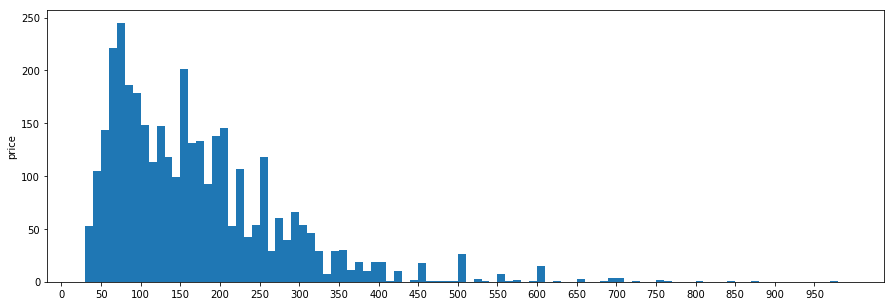

In [15]:
plt.figure(figsize = [15, 5])
bin_edges = np.arange(30, df_number['price'].max()+1, 10)
plt.hist(data=df_number,x='price',bins=bin_edges);
plt.xticks(np.arange(0,df_number['price'].max(), 50));
plt.ylabel("price");


In [16]:
df_number=df_number.fillna(df_number.mode())#Avoid floating point numbers in integer variables

In [18]:
price_statics=df_number.groupby(['review_scores_rating'])['price'].mean()

## 3.2 Calculate the correlation coefficient between different factors and review_rate

In [19]:
def calulate_coef(dataframe,columns):
    coef=pd.DataFrame()
    coef['columns']=dataframe.columns
    list=[]
    for col in dataframe.columns:
        c=dataframe[[col,columns]].corr()[columns][col]
        if(isinstance(c,np.float64)):
            list.append(c)
        else:
            c=1
            list.append(c)
    coef['coef']=list
    coef.sort_values('coef',ascending=False,inplace=True)
    return coef

In [20]:
coef=calulate_coef(df_number,"review_scores_rating")
coef.head()

,columns,coef
19,review_scores_rating,1.000000
25,review_scores_value,0.786373
21,review_scores_cleanliness,0.754368
20,review_scores_accuracy,0.705152
23,review_scores_communication,0.600643


In [21]:
x=list(coef['columns'])
y=list(coef['coef'])

### well,got a correlation chart
well ,we got answer to question 1 and 2

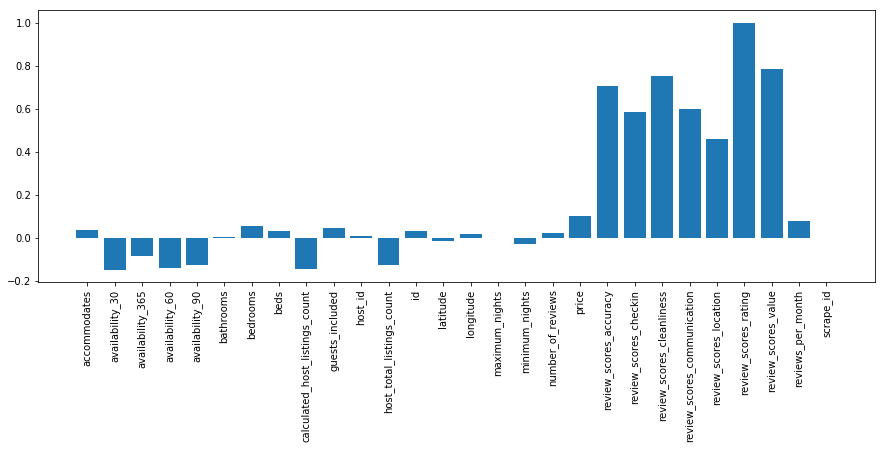

In [22]:
plt.figure(figsize=[15, 5])
plt.bar(x,y);
plt.xticks(rotation=90);

## 3.3 we could find that cleanliness and communication have a strong correlation with the review-rate

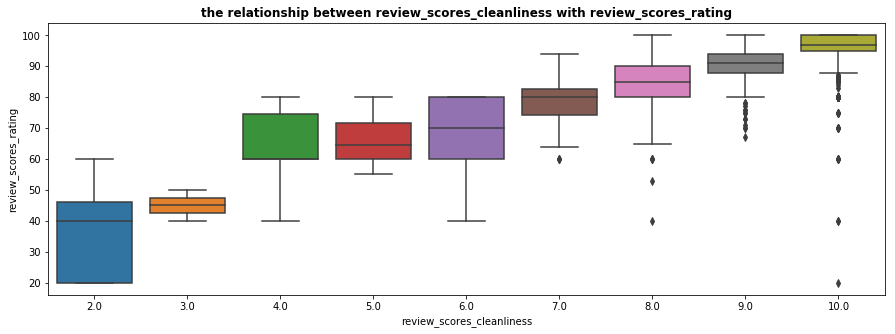

In [23]:
plt.figure(figsize=[15,5])
sns.boxplot(data=df_number,x='review_scores_cleanliness',y='review_scores_rating');
plt.title('the relationship between review_scores_cleanliness with review_scores_rating',fontsize='large',fontweight='bold');

### conclusion :By observing the box plot, we found that the relationship between hygiene and scoring is extremely strong.
meanwhile i want to know does increasing the number of bedrooms cause the decrease of cleanliness

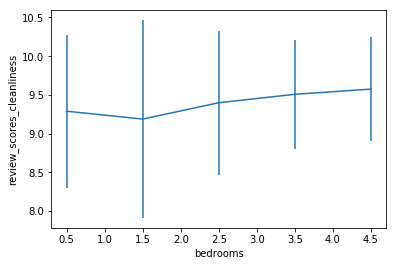

In [25]:
bin_size = 1
xbin_edges = np.arange(0, df_number['bedrooms'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]
xbin_centers
# compute statistics in each bin
data_xbins = pd.cut(df_number['bedrooms'], xbin_edges, right = False, include_lowest = True)
y_means = df_number['review_scores_cleanliness'].groupby(data_xbins).mean()
y_sems = df_number['review_scores_cleanliness'].groupby(data_xbins).std()#std 是标准差
# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems);
plt.xlabel('bedrooms');
plt.ylabel('review_scores_cleanliness');

well,we don't need to worry about it.with increasing the number of beadroom,the house become cleaner.

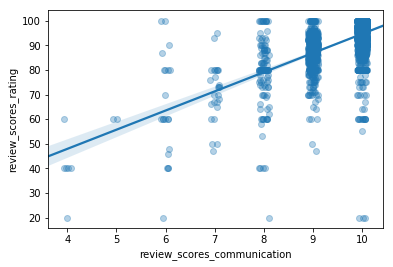

In [27]:
sns.regplot(data=df_number,x='review_scores_communication',y='review_scores_rating', fit_reg = True,x_jitter = 0.1,y_jitter = 0.02,scatter_kws = {'alpha' :1/3});

### Facts have proved that  take a communication with tourists, they will give you thumbs.

## final question: How to avoid a drop in praise rate

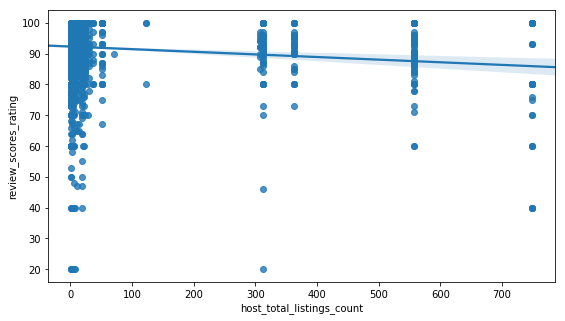

In [29]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 2)
sns.regplot(data = df_number, x='host_total_listings_count', y = 'review_scores_rating');

## it is easy to explain it.As the number of orders increases, the cleanliness of the room will decrease.So the vital key is to maintain your house.